<a href="https://colab.research.google.com/github/sravan19040/My-project/blob/main/Minor_project_Result_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data handling Imports
import pandas as pd
import numpy as np

#Visualizing Data Imports
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


#Notebook arrange Imports
import warnings
warnings.filterwarnings('ignore')

#Encoding Imports
from sklearn.preprocessing import LabelEncoder

#Feature Selection Imports
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

#Sampling Imports
from sklearn.model_selection import KFold

#Scaling Imports
from sklearn.preprocessing import StandardScaler

#Modeling Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Pre-processing Imports
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint


#Accuracy Validation Imports
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score,precision_recall_curve,\
confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

#Model Interpretation Imports
#import eli5, shap


#Other required libraries
import time
start = time. time()

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Read the dataset
mushroom_df = pd.read_csv('/content/mushrooms1.csv')

In [ ]:
print('\033[1m', 'First five rows of the dataset.', '\033[0m')
mushroom_df.head()

 First five rows of the dataset. 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,distribution,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
print('\033[1m', 'Statistical summary of all the columns', '\033[0m')
mushroom_df.describe()

 Statistical summary of all the columns 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,distribution,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Dealing with missing values in stalk-root column
mushroom_df['stalk-root'].replace('?', np.nan, inplace=True)
print('\033[1m', 'Value counts for stalk root before filling missing values: ', '\033[0m', mushroom_df['stalk-root'].value_counts(), sep='\n')
print('\033[1m', '\nNumber of null values: ', '\033[1m', mushroom_df['stalk-root'].isnull().sum())
mushroom_df['stalk-root'].fillna(mushroom_df['stalk-root'].mode()[0], inplace=True)
print('\033[1m', 'Value counts for stalk root after filling missing values with mode: ', '\033[0m', mushroom_df['stalk-root'].value_counts(), sep='\n')


Value counts for stalk root before filling missing values: 

stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64
 
Number of null values:   2480

Value counts for stalk root after filling missing values with mode: 

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64


In [ ]:
view_df = mushroom_df.copy()

# Creating labels for each column
labels = {
    'class': {'e':'edible', 'p':'poisonous'},
    'cap-shape': {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'},
    'cap-surface': {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'},
    'cap-color': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'bruises': {'t':'bruises', 'f':'no'},
    'odor': {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy'},
    'gill-attachment': {'a':'attached', 'f':'free', 'd':'descending', 'n':'notched'},
    'gill-spacing': {'c':'close', 'w':'crowded', 'd':'distant'},
    'gill-size': {'b':'broad', 'n':'narrow'},
    'gill-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-shape': {'e':'enlarging', 't':'tapering'},
    'stalk-root': {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted'},
    'stalk-surface-above-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-surface-below-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-color-above-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-color-below-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'veil-type': {'p':'partial', 'u':'universal'},
    'veil-color': {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'},
    'ring-number': {'n':'none', 'o':'one', 't':'two'},
    'ring-type': {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'},
    'spore-print-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'},
    'population': {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'},
    'habitat': {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'}
    }
view_df.replace(labels, inplace=True)

In [ ]:
# Defining a function to plot countplots of various columns from the dataset
def plot_countplots(col):
    fig=plt.figure(figsize=(22, 10));
    plt.subplot(221);
    sns.countplot(x=col, data=view_df, order=view_df[col].value_counts().index, palette='summer');
    sns.set_style('whitegrid');
    sns.despine(left=True);
    plt.xlabel('{} of the Mushroom'.format(col.replace('-', ' ').capitalize()), fontsize=16);
    plt.ylabel('');
    plt.title('Distribution of mushroom by {}'.format(col.replace('-', ' ')), fontsize=22, pad=10);
    plt.subplot(222);
    sns.countplot(x=col, data=view_df, hue='class', order=view_df[col].value_counts().index, palette='summer');
    plt.xlabel('{} of the Mushroom'.format(col.replace('-', ' ').capitalize()), fontsize=16);
    sns.set_style('whitegrid');
    sns.despine(left=True);
    plt.ylabel('');
    plt.title('Distribution of mushroom by {} and class'.format(col.replace('-', ' ')), fontsize=22, pad=10);
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', fontsize=12);
    plt.show();

**Preprocessing**

In [ ]:
le = LabelEncoder()
for col in list(view_df.columns):
    view_df[col] = le.fit_transform(view_df[col])

In [ ]:
print('\033[1m\033[4mDataset after encoding with Label Encoder\033[0m')
view_df

Dataset after encoding with Label Encoder


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,distribution,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,2,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,3,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,3,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,2,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,0,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,0,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,0,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


In [ ]:
# Drop the target column
X = view_df.drop('class', axis=1)
y = view_df['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,distribution,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,2,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,3,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,3,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,2,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,3,0,0


In [ ]:
# Encode the label encoded dataset
one_hot = OneHotEncoder()
X = one_hot.fit_transform(X).toarray()

**Splitting the data into training and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('\033[1m\033[4m Shape of training set features:\033[0m', X_train.shape,
      '\033[1m\033[4m Shape of training set target:\033[0m', y_train.shape,
      '\033[1m\033[4m Shape of test set features:\033[0m', X_test.shape,
      '\033[1m\033[4m Shape of test set features:\033[0m', y_test.shape,
      sep='\n')

 Shape of training set features:
(5686, 116)
 Shape of training set target:
(5686,)
 Shape of test set features:
(2438, 116)
 Shape of test set features:
(2438,)


**Model comparison using cross validation**

**Logistic Regression**

 Cross val accuracy:   [1.         1.         0.99824253 1.         1.         1.
 1.         1.         1.         0.99823944]  

 Mean of cross val accuracies:   0.9996481967375429


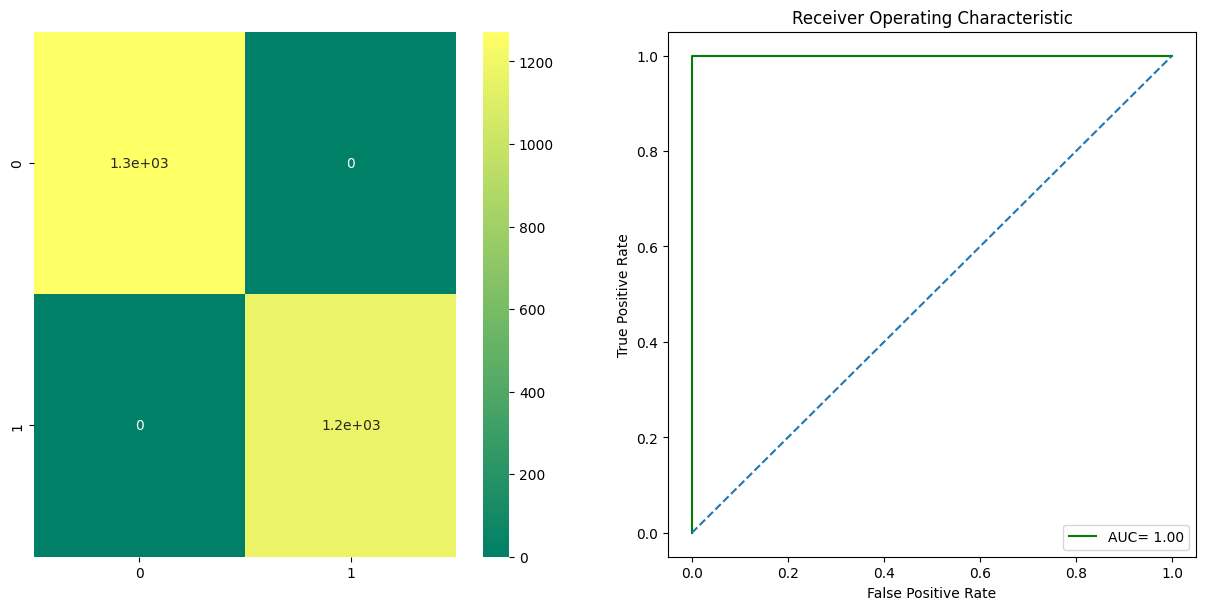

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

**GaussianNB**

 Cross val accuracy:   [0.94376098 0.95079086 0.93848858 0.94376098 0.96660808 0.95957821
 0.95598592 0.95246479 0.95774648 0.95598592]  

 Mean of cross val accuracies:   0.952517079630684


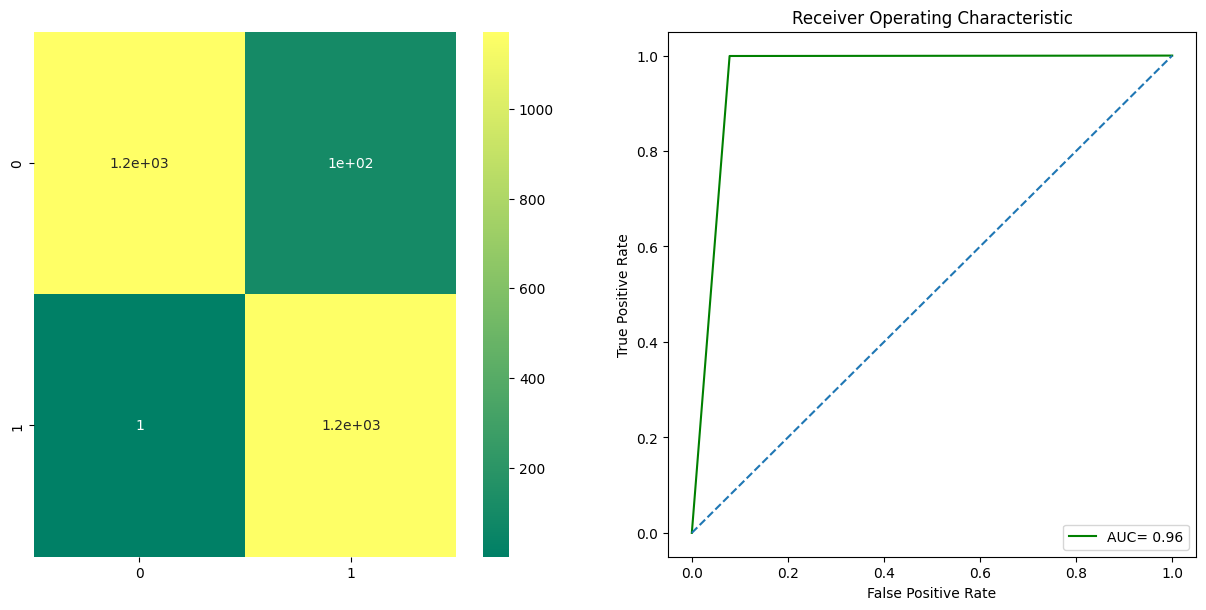

In [ ]:
clf = GaussianNB().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

**Decision Tree Classifier**

 Cross val accuracy:   [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99823944]  

 Mean of cross val accuracies:   0.9998239436619718


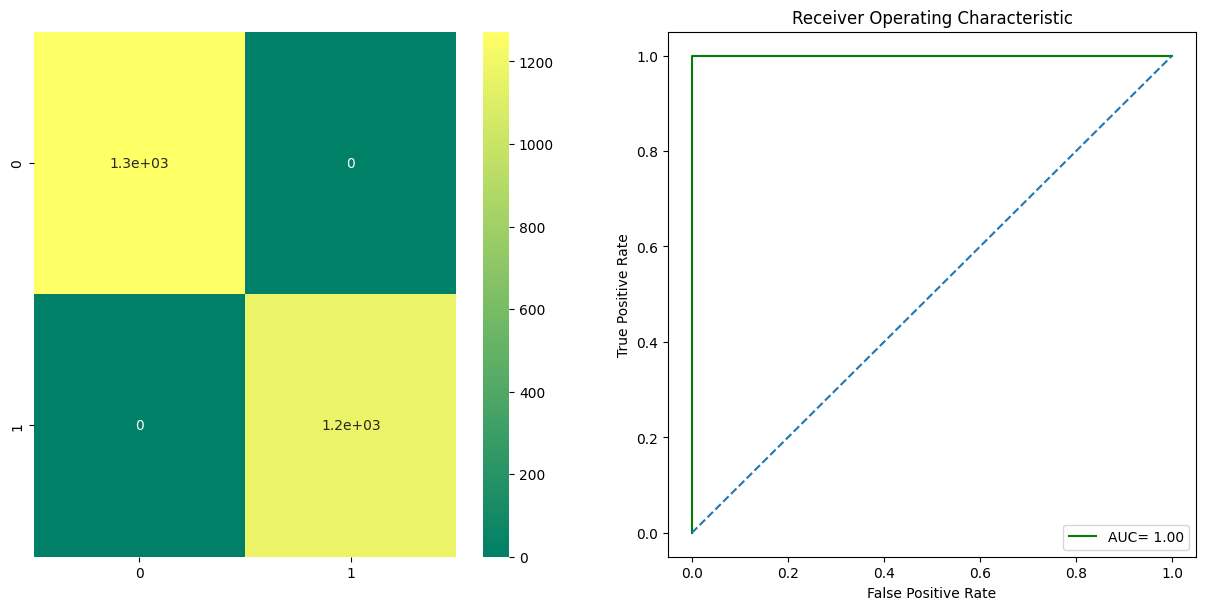

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

**Random Forest Classifier**

 Cross val accuracy:   [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]  

 Mean of cross val accuracies:   1.0


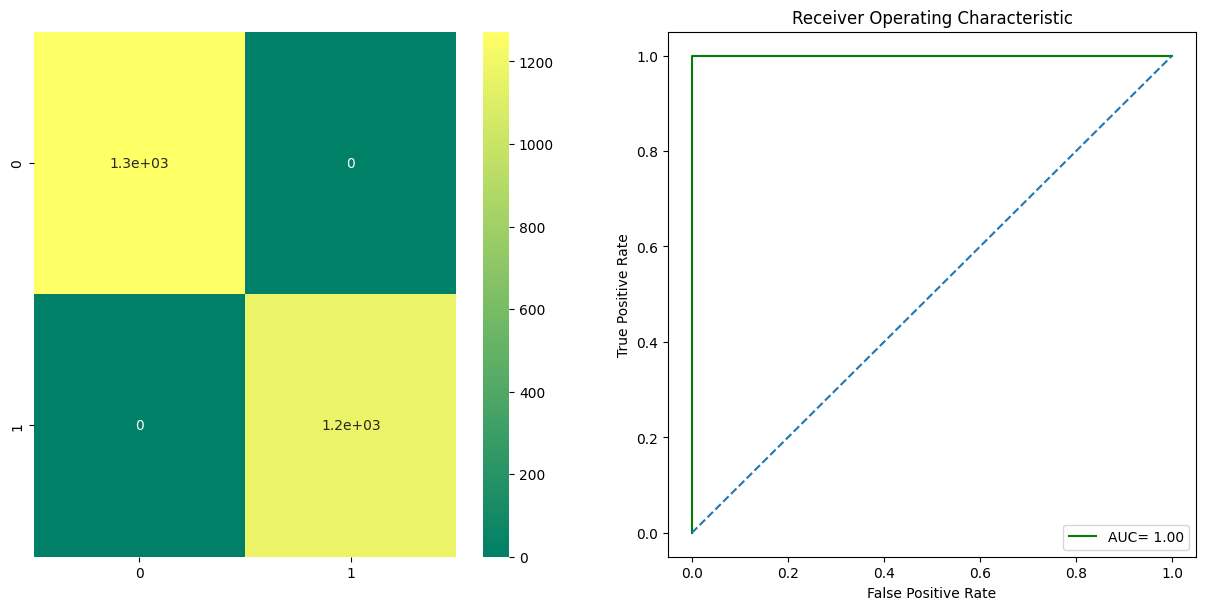

In [ ]:
clf = RandomForestClassifier().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

The highest accuracy is given by random forest classifier an accuracy of 1.0. Decision tree classifier gave an accuracy of 0.99982 and logistic regression 0.99964. Gaussian Naive Bayes gave the lowest accuracy among these 4 models choosen an accuracy of 0.9525.

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

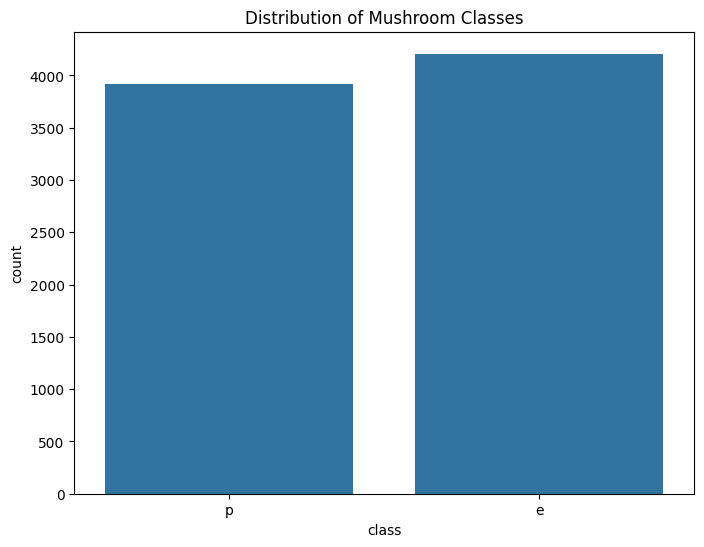

Correlation Matrix:
 Empty DataFrame
Columns: []
Index: []
Covariance Matrix:
 Empty DataFrame
Columns: []
Index: []
Model: Logistic Regression
Accuracy: 0.947076923076923
Precision: 0.9427480916030534
Recall: 0.9475703324808185
F1 Score: 0.9451530612244898
ROC AUC Score: 0.9470947747813344
Confusion Matrix:
 [[798  45]
 [ 41 741]]


Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from scipy.stats import skew, kurtosis, mode, variation, iqr

# Step 1: Load the dataset and perform EDA
df = pd.read_csv("mushrooms1.csv")

# Display first few rows of the dataset
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Mode
mode_val = df.mode().iloc[0]
print("Mode:\n", mode_val)


# Handling missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data visualization
# Example visualization: distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title("Distribution of Mushroom Classes")
plt.show()

# Step 2: Calculate and print correlation and covariance matrices
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:\n", correlation_matrix)

covariance_matrix = numerical_features.cov()
print("Covariance Matrix:\n", covariance_matrix)

# Step 4: Preprocessing
# Encoding categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Handling missing values (if any)
# Here, assuming missing values are already handled

# Splitting dataset into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Modeling and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

The highest accuracy is given by random forest classifier an accuracy of 1.0. Decision tree classifier gave an accuracy of 0.99982 and logistic regression 0.99964. Gaussian Naive Bayes gave the lowest accuracy among these 4 models choosen an accuracy of 0.9525.